In [67]:
import pandas as pd
from rdkit import Chem
import decompose_groups
from decompose_groups import decompse_ac 

In [68]:
db = pd.read_csv('./data/test_compounds.csv',index_col='compound_id')
db_smiles = db['smiles_pH7'].to_dict()

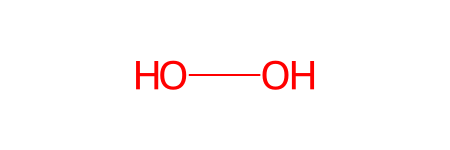

In [70]:
smiles_pH7 = db_smiles['C00027']
m = Chem.MolFromSmiles(smiles_pH7)

m

In [78]:
smi_count = dict()
radius = 2;
print('Radius',radius)
range(len(atomList))
for i in range(len(atomList)):
    env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,i)
    print('Atom:',i,', environment length:',len(env))
    if len(env) >= 1:
        atoms=set()
        for bidx in env:
            print(bidx)
            atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
            atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

        # only one atom is in this environment, such as O in H2O
        if len(atoms) == 0:
            atoms = {i}

        smi = Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),
                                    bondsToUse=env,canonical=True)

        if smi in smi_count:
            smi_count[smi] = smi_count[smi] + 1
        else:
            smi_count[smi] = 1
print('smi_count',smi_count)

Radius 2
Atom: 0 , environment length: 0
Atom: 1 , environment length: 0
smi_count {}


In [66]:
decompse_ac(db_smiles)